In [2]:
import json
import matplotlib.pyplot as plt

In [3]:
result = json.load(open('./epoch-results/epoch_0.json', 'r'))
result

{'eval_rouge-1': {'r': 0.17491444553210958,
  'p': 0.30659024344059166,
  'f': 0.21017443874993968},
 'eval_rouge-2': {'r': 0.06605963633801533,
  'p': 0.11970946588624735,
  'f': 0.07943832179624159},
 'eval_rouge-l': {'r': 0.1601286267468273,
  'p': 0.2815205305914063,
  'f': 0.19250356942233302}}

In [4]:
result['eval_rouge-1']

{'r': 0.17491444553210958, 'p': 0.30659024344059166, 'f': 0.21017443874993968}

In [5]:
# load all results
results = []
for i in range(10):
    results.append(json.load(open('./epoch-results/epoch_{}.json'.format(i), 'r')))

In [6]:
rouge_1 = {'f': [], 'p': [], 'r': []}
rouge_2 = {'f': [], 'p': [], 'r': []}
rouge_l = {'f': [], 'p': [], 'r': []}

for result in results:
    rouge_1['f'].append(result['eval_rouge-1']['f'])
    rouge_1['p'].append(result['eval_rouge-1']['p'])
    rouge_1['r'].append(result['eval_rouge-1']['r'])

    rouge_2['f'].append(result['eval_rouge-2']['f'])
    rouge_2['p'].append(result['eval_rouge-2']['p'])
    rouge_2['r'].append(result['eval_rouge-2']['r'])

    rouge_l['f'].append(result['eval_rouge-l']['f'])
    rouge_l['p'].append(result['eval_rouge-l']['p'])
    rouge_l['r'].append(result['eval_rouge-l']['r'])


In [9]:
def plot_rouge(rouge_dict, rouge_type):
    x_values = range(1, len(rouge_dict['f'])+1)
    plt.plot(x_values, rouge_dict['f'], label='f', marker='o')
    plt.plot(x_values, rouge_dict['p'], label='p', marker='o')
    plt.plot(x_values, rouge_dict['r'], label='r', marker='o')
    plt.xticks(x_values)  # Set x-axis values to start from 1
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel(f'Rouge-{rouge_type}')
    plt.title(f'Rouge-{rouge_type} Scores')
    # save figure
    plt.savefig(f'rouge_{rouge_type}.png')
    plt.show()

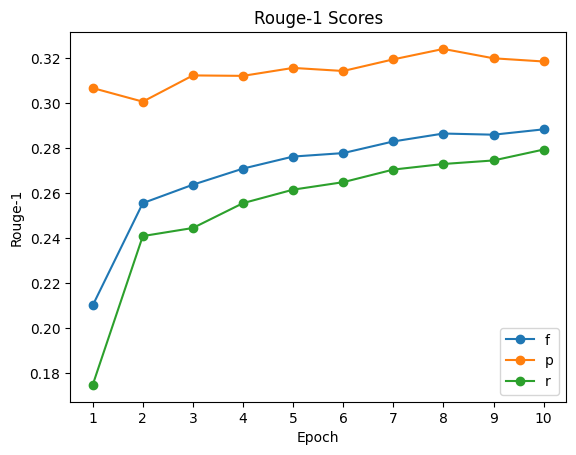

In [12]:
plot_rouge(rouge_1, 1)

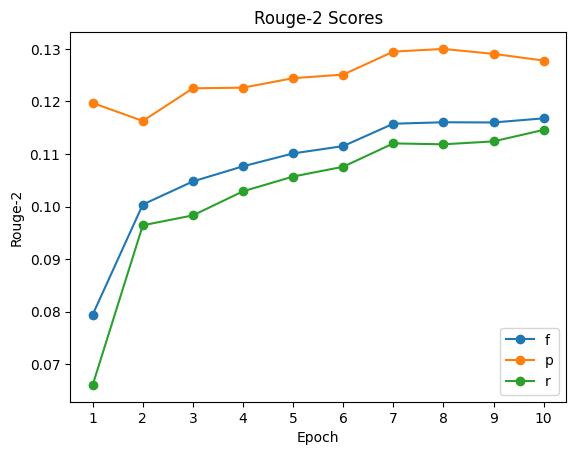

In [10]:
plot_rouge(rouge_2, 2)

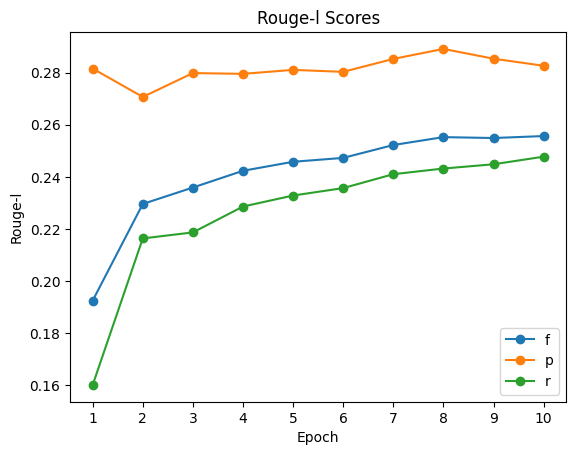

In [11]:
plot_rouge(rouge_l, 'l')